In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

In [2]:
data = './data'
closed_deals_data = data + '/olist_closed_deals_dataset.csv'
customers_data = data + '/olist_customers_dataset.csv'
geolocation_data = data + '/olist_geolocation_dataset.csv'
marketing_qualified_leads_data = data + '/olist_marketing_qualified_leads_dataset.csv'
order_items_data = data + '/olist_order_items_dataset.csv'
order_payments_data = data + '/olist_order_payments_dataset.csv'
order_reviews_data = data + '/olist_order_reviews_dataset.csv'
orders_data = data + '/olist_orders_dataset.csv'
products_data = data + '/olist_products_dataset.csv'
sellers_data = data + '/olist_sellers_dataset.csv'
product_category_name_translation_data = data + '/product_category_name_translation.csv'

In [3]:
closed_deals_data = pd.read_csv(closed_deals_data)
customers_data = pd.read_csv(customers_data)
geolocation_data = pd.read_csv(geolocation_data)
marketing_qualified_leads_data = pd.read_csv(marketing_qualified_leads_data)
order_items_data = pd.read_csv(order_items_data)
order_payments_data = pd.read_csv(order_payments_data)
order_reviews_data = pd.read_csv(order_reviews_data)
orders_data = pd.read_csv(orders_data)
products_data = pd.read_csv(products_data)
sellers_data = pd.read_csv(sellers_data)
product_category_name_translation_data = pd.read_csv(product_category_name_translation_data)

### 재구매율 향상 전략:  셀러들이 고객의 재구매를 유도하기 위해 어떠한 전략을 취할 수 있을지 분석. 이를 위해, 고객의 재구매 패턴, 선호하는 상품 범주, 가격 대비 가치 인식 등.

#### 데이터 merge 및 가공

In [5]:
# 재구매율 향상 전략: 셀러들이 고객의 재구매를 유도하기 위해 어떠한 전략을 취할 수 있을지 분석. 이를 위해, 고객의 재구매 패턴, 선호하는 상품 범주, 가격 대비 가치 인식 등.
# 고객의 재구매 패턴을 분석하기 위해, olist_orders_dataset, olist_order_items_dataset, olist_products_dataset, olist_customers_dataset를 merge하여 사용

# olist_orders_dataset, olist_order_items_dataset, olist_products_dataset, olist_customers_dataset merge
olist_data = pd.merge(orders_data, order_items_data, on='order_id')
olist_data = pd.merge(olist_data, products_data, on='product_id')
olist_data = pd.merge(olist_data, customers_data, on='customer_id')
olist_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,828.0,4.0,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,500.0,2.0,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,1893.0,1.0,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [6]:
# 고객의 재구매 패턴을 분석하기 위해, 고객의 주문 횟수를 계산
customer_order_count = olist_data.groupby('customer_unique_id')['order_id'].count().reset_index()
customer_order_count = customer_order_count.rename(columns={'order_id': 'order_count'})
customer_order_count

# order_count가 2이상인 고객만 추출, 동일 고객이 다른 날짜에 주문한 경우(재구매)를 의미, 같은날짜에 2회이상 구매는 고려하지 않음
repeat_customer_data = customer_order_count[customer_order_count['order_count'] >= 2]
repeat_customer_data['order_count'].value_counts()

order_count
2     8996
3     1672
4      632
5      254
6      198
7       46
8       16
10      11
9       11
11      11
12       9
14       3
13       2
15       2
20       2
16       1
18       1
21       1
24       1
Name: count, dtype: int64

In [7]:
# 재구매 count가 5이상 데이터만 추출
repeat_customer_count = repeat_customer_data[(repeat_customer_data['order_count'] >= 5)]
repeat_customer_count

,customer_unique_id,order_count
229,0097fca0db567f5ca79509b7b4fc1c2d,7
260,00ae50eb5e1d2514f694dee1dcbbd5ae,5
621,019ed386aec9ff0f9eab4a590231174e,6
759,0209a0a5c96cc50dd1bbe71e3730af2a,6
762,0209f290b5451d357308bc0e90521026,6
...,...,...
94731,fe2b2f70f3dc31c23319ae1029eac77f,11
94863,fe81bb32c243a86b2f86fbf053fe6140,5
94876,fe86d9409d83a3c561ce16e64d2d55e6,6
95230,ff7f36f6ba0f1126bb95b635322cf9d2,6


In [8]:
# 거래기록 전부추출
repeat_customer_data = olist_data[olist_data['customer_unique_id'].isin(repeat_customer_count['customer_unique_id'])]
repeat_customer_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1,a5a0e71a81ae65aa335e71c06261e260,...,698.0,3.0,705.0,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
84,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,2,a5a0e71a81ae65aa335e71c06261e260,...,698.0,3.0,705.0,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
85,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,3,a5a0e71a81ae65aa335e71c06261e260,...,698.0,3.0,705.0,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
86,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,4,a5a0e71a81ae65aa335e71c06261e260,...,698.0,3.0,705.0,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
87,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,5,a5a0e71a81ae65aa335e71c06261e260,...,698.0,3.0,705.0,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112507,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,delivered,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,1,53759a2ecddad2bb87a079a1f1519f73,...,340.0,2.0,1500.0,30.0,22.0,30.0,5bc738a48bdb9ca1f798d56de2cce84c,13035,campinas,SP
112508,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,delivered,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,2,422879e10f46682990de24d770e7f83d,...,348.0,2.0,1550.0,30.0,22.0,30.0,5bc738a48bdb9ca1f798d56de2cce84c,13035,campinas,SP
112509,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,delivered,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,3,53759a2ecddad2bb87a079a1f1519f73,...,340.0,2.0,1500.0,30.0,22.0,30.0,5bc738a48bdb9ca1f798d56de2cce84c,13035,campinas,SP
112510,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,delivered,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11 00:00:00,4,53759a2ecddad2bb87a079a1f1519f73,...,340.0,2.0,1500.0,30.0,22.0,30.0,5bc738a48bdb9ca1f798d56de2cce84c,13035,campinas,SP


#### 사람들이 보통 언제 구매를 하는지 시각화

In [9]:
repeat_customer_data['order_purchase_timestamp'] = pd.to_datetime(repeat_customer_data['order_purchase_timestamp'])
repeat_customer_data['order_purchase_hour'] = repeat_customer_data['order_purchase_timestamp'].dt.hour

# repeat_customer_data는 데이터 프레임으로 주문 구매 시간 정보를 포함하고 있다고 가정

fig = go.Figure()

# 주문 구매 시간에 대한 막대 그래프 생성
fig.add_trace(go.Bar(
    x=repeat_customer_data['order_purchase_hour'].value_counts().index,
    y=repeat_customer_data['order_purchase_hour'].value_counts().values,
    marker_color=px.colors.qualitative.Plotly
))

# 레이아웃 설정
fig.update_layout(
    title='재구매 고객의 구매 시간대 분포',
    xaxis_title='구매 시간',
    yaxis_title='수량'
)

# 그래프 출력
fig.show()

/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_35412/1434040488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customer_data['order_purchase_timestamp'] = pd.to_datetime(repeat_customer_data['order_purchase_timestamp'])
/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_35412/1434040488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customer_data['order_purchase_hour'] = repeat_customer_data['order_purchase_timestamp'].dt.hour


#### 낮 시간(9시~17시)에 거래된 카테고리를 분석

In [10]:
# 낮 시간(9시~17시)에 거래된 카테고리를 분석
daytime_data = repeat_customer_data[(repeat_customer_data['order_purchase_hour'] >= 9) & (repeat_customer_data['order_purchase_hour'] <= 17)]
daytime_category_count = daytime_data['product_category_name'].value_counts().reset_index()
daytime_category_count = daytime_category_count.rename(columns={'index': 'product_category_name', 'product_category_name': 'product_category_name'})
daytime_category_count

# 낮 시간(9시~17시)에 거래된 카테고리를 시각화
fig = go.Figure()

# 낮 시간에 거래된 카테고리에 대한 막대 그래프 생성
fig.add_trace(go.Bar(
    x=daytime_category_count['product_category_name'],
    y=daytime_category_count['count'],
    marker_color= px.colors.qualitative.Plotly
))

# 레이아웃 설정
fig.update_layout(
    title='낮 시간(9시~17시)에 거래된 카테고리 분포',
    xaxis_title='카테고리',
    yaxis_title='수량',
    # 크기 조정
    width=1600,
    height=800
)
fig.show()

#### 밤 시간(18시~23시)에 거래된 카테고리를 분석

In [11]:
# 밤 시간(18시~23시)에 거래된 카테고리를 분석
nighttime_data = repeat_customer_data[(repeat_customer_data['order_purchase_hour'] >= 18) & (repeat_customer_data['order_purchase_hour'] <= 23)]
nighttime_category_count = nighttime_data['product_category_name'].value_counts().reset_index()
nighttime_category_count = nighttime_category_count.rename(columns={'index': 'product_category_name', 'product_category_name': 'product_category_name'})

# 밤 시간(18시~23시)에 거래된 카테고리를 시각화
fig = go.Figure()

# 밤 시간에 거래된 카테고리에 대한 막대 그래프 생성
fig.add_trace(go.Bar(
    x=nighttime_category_count['product_category_name'],
    y=nighttime_category_count['count'],
    marker_color= px.colors.qualitative.Plotly
))

# 레이아웃 설정
fig.update_layout(
    title='밤 시간(18시~23시)에 거래된 카테고리 분포',
    xaxis_title='카테고리',
    yaxis_title='수량',
    # 크기 조정
    width=1600,
    height=800
)
fig.show()

#### 낮에 거래된 카테고리별 배송비 평균

In [12]:
daytime_data = pd.merge(daytime_data, order_payments_data, on='order_id')
daytime_category_fee = daytime_data.groupby('product_category_name')['freight_value'].mean().reset_index()
daytime_category_fee = daytime_category_fee.rename(columns={'freight_value': 'average_freight_value'})

# 시각화
fig = px.bar(daytime_category_fee, x='product_category_name', y='average_freight_value', color='average_freight_value', color_continuous_scale='Viridis')
fig.update_layout(
    title='낮 시간(9시~17시)에 거래된 카테고리별 평균 배송비',
    xaxis_title='카테고리',
    yaxis_title='평균 배송비',
    width=1600,
    height=800
)
fig.show()

#### 밤에 거래된 카테고리별 배송비 평균

In [13]:
nighttime_data = pd.merge(nighttime_data, order_payments_data, on='order_id')
nighttime_category_fee = nighttime_data.groupby('product_category_name')['freight_value'].mean().reset_index()
nighttime_category_fee = nighttime_category_fee.rename(columns={'freight_value': 'average_freight_value'})

fig = px.bar(nighttime_category_fee, x='product_category_name', y='average_freight_value', color='average_freight_value', color_continuous_scale='Viridis')
fig.update_layout(
    title='밤 시간(18시~23시)에 거래된 카테고리별 평균 배송비',
    xaxis_title='카테고리',
    yaxis_title='평균 배송비',
    width=1600,
    height=800
)
fig.show()

#### 낮과 밤의 배송비 평균 비교

In [14]:
day_night_category_fee = pd.merge(daytime_category_fee, nighttime_category_fee, on='product_category_name')
day_night_category_fee = day_night_category_fee.rename(columns={'average_freight_value_x': 'daytime_average_freight_value', 'average_freight_value_y': 'nighttime_average_freight_value'})
day_night_category_fee['diff'] = day_night_category_fee['daytime_average_freight_value'] - day_night_category_fee['nighttime_average_freight_value']
day_night_category_fee

,product_category_name,daytime_average_freight_value,nighttime_average_freight_value,diff
0,agro_industria_e_comercio,25.007273,34.150000,-9.142727
1,alimentos_bebidas,19.830000,8.026667,11.803333
2,automotivo,14.560000,17.018333,-2.458333
3,bebes,10.405862,24.301765,-13.895903
4,bebidas,18.678947,16.110000,2.568947
5,beleza_saude,15.398972,11.483768,3.915204
6,brinquedos,18.446061,24.243333,-5.797273
7,cama_mesa_banho,16.818238,17.338214,-0.519977
8,casa_conforto,9.905714,1.240000,8.665714
9,casa_construcao,11.753846,15.449091,-3.695245


#### 금액 시각화

In [15]:
# 차이나는 금액을 시각화
# 배송비 차이가 양수이면 낮에 더 비싸고 음수이면 밤에 더 비싸다는 것을 의미
import plotly.express as px

fig = px.bar(day_night_category_fee, x='product_category_name', y='diff', color='diff', color_continuous_scale='Plasma')
fig.update_layout(
    title='낮과 밤의 배송비 평균 차이',
    xaxis_title='카테고리',
    yaxis_title='배송비 평균 차이',
    width=1600,
    height=800
)
fig.show()

#### 비정상적인 'sinalizacao_e_seguranca'의 배송비 분석

In [16]:
# olist_geolocation_dataset.csv, olist_order_customer_dataset.csv, olist_sellers_dataset.csv의 zip_code_prefix를 기준으로 join
geolocation_data = geolocation_data.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'})
customers_data = customers_data.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'})
 
geo_customer_data = pd.merge(geolocation_data, customers_data, on='zip_code_prefix') # 고객 위치 데이터

# sinalizacao_e_seguranca라는 카테고리의 상품을 구매한 고객들의 위치를 지도로 표시, olist_geolocation_dataset와 day_night_category_fee 데이터 사용
sinalizacao_e_seguranca_data = olist_data[olist_data['product_category_name'] == 'sinalizacao_e_seguranca']
sinalizacao_e_seguranca_data = pd.merge(sinalizacao_e_seguranca_data, geo_customer_data, on='customer_id')
sinalizacao_e_seguranca_data



import folium
from folium.plugins import MarkerCluster

def plot_customer_locations(data, num_samples=100):
    # 데이터 샘플링
    sample_data = data.sample(n=min(num_samples, len(data)), replace=False)
    
    # 지도 생성
    m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)
    
    # MarkerCluster 레이어 생성
    marker_cluster = MarkerCluster().add_to(m)

    for index, row in sample_data.iterrows():
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"고객 ID: {row['customer_id']}",
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    return m

# 함수 호출하여 특정 카테고리의 고객 위치를 지도에 표시
plot_customer_locations(sinalizacao_e_seguranca_data, num_samples=100)

In [17]:
import folium
from folium.plugins import MarkerCluster

def plot_daytime_customer_locations(data, num_samples=100):
    # 데이터 샘플링
    sample_data = data.sample(n=min(num_samples, len(data)), replace=False)
    
    # 지도 생성
    m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)
    
    # MarkerCluster 레이어 생성
    marker_cluster = MarkerCluster().add_to(m)
    
    sample_data['order_purchase_timestamp'] = pd.to_datetime(sample_data['order_purchase_timestamp'])
    sample_data['order_purchase_hour'] = sample_data['order_purchase_timestamp'].dt.hour
    
    for index, row in sample_data.iterrows():
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"고객 ID: {row['customer_id']}",
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    return m

def plot_nighttime_customer_locations(data, num_samples=100):
    # 데이터 샘플링
    sample_data = data.sample(n=min(num_samples, len(data)), replace=False)
    
    # 지도 생성
    m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)
    
    # MarkerCluster 레이어 생성
    marker_cluster = MarkerCluster().add_to(m)
    
    sample_data['order_purchase_timestamp'] = pd.to_datetime(sample_data['order_purchase_timestamp'])
    sample_data['order_purchase_hour'] = sample_data['order_purchase_timestamp'].dt.hour
    
    for index, row in sample_data.iterrows():
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"고객 ID: {row['customer_id']}",
            icon=folium.Icon(color='red')
        ).add_to(marker_cluster)

    return m

In [18]:
# 낮
plot_daytime_customer_locations(sinalizacao_e_seguranca_data, num_samples=100)

In [19]:
# 밤
plot_nighttime_customer_locations(sinalizacao_e_seguranca_data, num_samples=100)

#### 모든 시간에 거래된 카테고리에서 sellor와의 관계
> 모든 시간에 거래가 많은 sellor에게 줄수있는 피드백

### TOP2명의 sellor를 분석
- 6560211a19b47992c3666cc44a7e94c0
- 4a3ca9315b744ce9f8e9374361493884

In [20]:
# 낮과 밤 전체에서 거래된 카테고리에서 sellor와의 관계, 100회이상 거래한 seller만 추출
seller_order_count = olist_data['seller_id'].value_counts().reset_index()
seller_order_count = seller_order_count.rename(columns={'index': 'seller_id', 'seller_id': 'seller_id'})
seller_order_count

,seller_id,count
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,9bf11dfc0bec77e5a23028043c3c5a8f,1
3091,578460d8319c51dab351cd9db95eadfe,1
3092,3b18f9856c6eb2413eafedb58e9eecd9,1
3093,05a48cc8859962767935ab9087417fbb,1


#### 6560211a19b47992c3666cc44a7e94c0 Sellor 분석

In [28]:
# sellor_data1은 6560211a19b47992c3666cc44a7e94c0
# sellor_data2는 4a3ca9315b744ce9f8e9374361493884

seller_data1 = olist_data[olist_data['seller_id'] == '6560211a19b47992c3666cc44a7e94c0']
seller_data2 = olist_data[olist_data['seller_id'] == '4a3ca9315b744ce9f8e9374361493884']

seller_data1['order_approved_at'] = pd.to_datetime(seller_data1['order_approved_at'])
seller_data1['order_delivered_carrier_date'] = pd.to_datetime(seller_data1['order_delivered_carrier_date'])
seller_data1['delivery_time'] = seller_data1['order_delivered_carrier_date'] - seller_data1['order_approved_at']
seller_data1['delivery_time'] = seller_data1['delivery_time'].dt.days

seller_data2['order_approved_at'] = pd.to_datetime(seller_data2['order_approved_at'])
seller_data2['order_delivered_carrier_date'] = pd.to_datetime(seller_data2['order_delivered_carrier_date'])
seller_data2['delivery_time'] = seller_data2['order_delivered_carrier_date'] - seller_data2['order_approved_at']
seller_data2['delivery_time'] = seller_data2['delivery_time'].dt.days

# 평균 배송시간 계산
seller1_delivery_time = seller_data1['delivery_time'].mean()
seller2_delivery_time = seller_data2['delivery_time'].mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['6560211a19b47992c3666cc44a7e94c0', '4a3ca9315b744ce9f8e9374361493884'],
    y=[seller1_delivery_time, seller2_delivery_time],
    marker_color=px.colors.qualitative.Plotly
))
fig.update_layout(
    title='sellor별 평균 배송시간',
    xaxis_title='sellor_id',
    yaxis_title='평균 배송시간'
)
fig.show()

/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_35412/248211266.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_35412/248211266.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_35412/248211266.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [48]:
# sellor_data1에서 평균시간보다 높은 배송시간을 가진 데이터만 추출
seller_data2_high_delivery_time = seller_data2[seller_data2['delivery_time'] < seller1_delivery_time]
seller_data2_high_delivery_time

# 카테고리별 평균 배송시간 계산
seller2_category_delivery_time = seller_data2.groupby('product_category_name')['delivery_time'].mean().reset_index()
seller2_category_delivery_time = seller2_category_delivery_time.rename(columns={'delivery_time': 'average_delivery_time'})
seller2_category_delivery_time

,product_category_name,average_delivery_time
0,bebes,1.200000
1,brinquedos,3.472727
2,cama_mesa_banho,1.777212
3,casa_conforto,1.646091
4,casa_conforto_2,1.423077
5,cool_stuff,4.000000
6,moveis_decoracao,2.847059


In [47]:
seller2_category_data = seller_data2[seller_data2['product_category_name'] == 'brinquedos']
seller2_category_data

# 같은 product_id를 가진 데이터가 몇개인지 확인
seller2_category_data['product_id'].value_counts()

# b3716b1e3576d3f2f246139d80c67d6a 제품의 판매일수 확인
seller2_category_data = seller2_category_data[seller2_category_data['product_id'] == 'b3716b1e3576d3f2f246139d80c67d6a']
seller2_category_data['order_purchase_timestamp'] = pd.to_datetime(seller2_category_data['order_purchase_timestamp'])
seller2_category_data['order_approved_at'] = pd.to_datetime(seller2_category_data['order_approved_at'])
seller2_category_data['delivery_time'] = seller2_category_data['order_approved_at'] - seller2_category_data['order_purchase_timestamp']
seller2_category_data['delivery_time'] = seller2_category_data['delivery_time'].dt.days
seller2_category_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time
76704,f4a9a8dac06f384b1b71b01d433a1a5b,69c28b2b49b4b0b3beba4e396cee5551,delivered,2018-02-19 10:13:31,2018-02-19 10:27:42,2018-02-22 18:46:55,2018-03-29 12:58:43,2018-03-16 00:00:00,1,b3716b1e3576d3f2f246139d80c67d6a,...,1.0,200.0,45.0,15.0,35.0,f97d06a1f2852e15f64e0036d03f486a,44052,feira de santana,BA,0
79623,ea88ef80cceb79ad79ed25ed33d0b7d9,67198606d2a581bfeba1a019e45ab276,delivered,2018-05-03 10:09:55,2018-05-03 10:57:05,2018-05-08 14:45:00,2018-05-11 22:46:21,2018-06-04 00:00:00,1,b3716b1e3576d3f2f246139d80c67d6a,...,1.0,200.0,45.0,15.0,35.0,c9f2898089cc985c092323f1fa128c6a,13224,varzea paulista,SP,0
88932,c7436c65f20daf8cd6e18c35a97867c7,61f0e827727727a1a58f6eb63b553288,delivered,2018-01-13 10:43:54,2018-01-13 10:50:29,2018-01-15 22:42:48,2018-02-02 17:32:36,2018-02-14 00:00:00,1,b3716b1e3576d3f2f246139d80c67d6a,...,1.0,200.0,45.0,15.0,35.0,1a24445f0e6006e4336ecba4ba576e4b,21321,rio de janeiro,RJ,0
92947,2393507a21cc6be871d9bd669eb0d6d9,5d018d6522babc97ecca4ca9be0803e2,delivered,2017-05-14 16:29:24,2017-05-14 16:42:25,2017-05-17 15:00:15,2017-05-22 09:04:33,2017-05-31 00:00:00,1,b3716b1e3576d3f2f246139d80c67d6a,...,1.0,200.0,45.0,15.0,35.0,7f3b9536876c3239ba95fb41c3799ea5,5859,sao paulo,SP,0


##### 어떤 카테고리를 많이 판매하였는가?

In [177]:
# '6560211a19b47992c3666cc44a7e94c0'라는 seller가 판매한 상품의 카테고리 분포
seller_category_count = seller_data['product_category_name'].value_counts().reset_index()
seller_category_count = seller_category_count.rename(columns={'index': 'product_category_name', 'product_category_name': 'product_category_name'})
seller_category_count

# relogios_presentes는 선물용 시계를 의미
# fashion_bolsas_e_acessorios는 패션 가방 및 액세서리를 의미

,product_category_name,count
0,cama_mesa_banho,1572
1,casa_conforto,243
2,moveis_decoracao,85
3,brinquedos,55
4,casa_conforto_2,26
5,bebes,5
6,cool_stuff,1


##### 어느 위치에 거주하는 고객에게 많이 판매하였는가?

In [131]:
# olist_geolocation_dataset.csv, olist_order_customer_dataset.csv, olist_sellers_dataset.csv의 zip_code_prefix를 기준으로 join
geolocation_data = geolocation_data.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'})
customers_data = customers_data.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'})
 
geo_customer_data = pd.merge(geolocation_data, customers_data, on='zip_code_prefix') # 고객 위치 데이터

In [132]:
geo_customer_data

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_city,customer_state
0,1037,-23.545621,-46.639292,sao paulo,SP,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,sao paulo,SP
1,1037,-23.545621,-46.639292,sao paulo,SP,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,sao paulo,SP
2,1037,-23.545621,-46.639292,sao paulo,SP,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,sao paulo,SP
3,1046,-23.546081,-46.644820,sao paulo,SP,9a02295e3381803554347ab4dc1ab41b,182491a144858edd68163675689069d6,sao paulo,SP
4,1046,-23.546081,-46.644820,sao paulo,SP,51795c9dc161dc05ef36dc8460dfa7e7,86ef1d99643569be4c21378742544d2e,sao paulo,SP
...,...,...,...,...,...,...,...,...,...
15083450,99950,-28.070104,-52.018658,tapejara,RS,11ec73ddb032be97ae8f0219cce6cfa3,6b4f7aec68e9574e9383d72653ae0ea1,tapejara,RS
15083451,99950,-28.070104,-52.018658,tapejara,RS,51293a462a75bbaa62b024a7da9e068a,6979b81e6b16100f6a5213030d2c8f82,tapejara,RS
15083452,99950,-28.070104,-52.018658,tapejara,RS,4e37f00d687d9dbb17009dea9767b1e6,2c764c0bf39fab6c7681ae5f92b99ccf,tapejara,RS
15083453,99950,-28.070104,-52.018658,tapejara,RS,cbc69ea8e3b1fdb3cbc421f7d3f72fc1,e8c460b5205d1bf57563df974affcb78,tapejara,RS


In [133]:
# product_category_name에 잘판린 TOP2(relogios_presentes, fashion_bolsas_e_acessorios)를 구매한 고객들의 위치를 지도로 표시, 겹치는 정보를 제거

relogios_presentes_data = olist_data[olist_data['product_category_name'] == 'relogios_presentes']
relogios_presentes_data = pd.merge(relogios_presentes_data, geo_customer_data, on='customer_id')
relogios_presentes_data

fashion_bolsas_e_acessorios_data = olist_data[olist_data['product_category_name'] == 'fashion_bolsas_e_acessorios']
fashion_bolsas_e_acessorios_data = pd.merge(fashion_bolsas_e_acessorios_data, geo_customer_data, on='customer_id')
fashion_bolsas_e_acessorios_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city_x,customer_state_x,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_unique_id_y,customer_city_y,customer_state_y
0,4b3a605942f29d490cb74bd6ace6b9f0,e8a332c3433fbd37920ec89fc295d075,delivered,2017-09-29 09:32:17,2017-09-29 09:44:12,2017-09-29 21:58:48,2017-09-30 16:55:39,2017-10-17 00:00:00,1,ffd4bf4306745865e5692f69bd237893,...,porto alegre,RS,90440,-30.018945,-51.198053,porto alegre,RS,0a5df23b922b9998bb7378f1ac03c98a,porto alegre,RS
1,4b3a605942f29d490cb74bd6ace6b9f0,e8a332c3433fbd37920ec89fc295d075,delivered,2017-09-29 09:32:17,2017-09-29 09:44:12,2017-09-29 21:58:48,2017-09-30 16:55:39,2017-10-17 00:00:00,1,ffd4bf4306745865e5692f69bd237893,...,porto alegre,RS,90440,-30.026482,-51.196271,porto alegre,RS,0a5df23b922b9998bb7378f1ac03c98a,porto alegre,RS
2,4b3a605942f29d490cb74bd6ace6b9f0,e8a332c3433fbd37920ec89fc295d075,delivered,2017-09-29 09:32:17,2017-09-29 09:44:12,2017-09-29 21:58:48,2017-09-30 16:55:39,2017-10-17 00:00:00,1,ffd4bf4306745865e5692f69bd237893,...,porto alegre,RS,90440,-30.035504,-51.192118,porto alegre,RS,0a5df23b922b9998bb7378f1ac03c98a,porto alegre,RS
3,4b3a605942f29d490cb74bd6ace6b9f0,e8a332c3433fbd37920ec89fc295d075,delivered,2017-09-29 09:32:17,2017-09-29 09:44:12,2017-09-29 21:58:48,2017-09-30 16:55:39,2017-10-17 00:00:00,1,ffd4bf4306745865e5692f69bd237893,...,porto alegre,RS,90440,-30.033081,-51.193274,porto alegre,RS,0a5df23b922b9998bb7378f1ac03c98a,porto alegre,RS
4,4b3a605942f29d490cb74bd6ace6b9f0,e8a332c3433fbd37920ec89fc295d075,delivered,2017-09-29 09:32:17,2017-09-29 09:44:12,2017-09-29 21:58:48,2017-09-30 16:55:39,2017-10-17 00:00:00,1,ffd4bf4306745865e5692f69bd237893,...,porto alegre,RS,90440,-30.028475,-51.194635,porto alegre,RS,0a5df23b922b9998bb7378f1ac03c98a,porto alegre,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296478,9058bc799c3791077efb3aaa8e0d5e02,3fb83e207757e8f15ff70d937c86929b,delivered,2017-01-24 09:24:11,2017-01-25 02:45:13,2017-01-25 13:20:38,2017-01-30 09:39:02,2017-03-01 00:00:00,1,a6f74de3ddfbdc9b33885b92656f992b,...,cruzeiro da fortaleza,MG,38735,-18.964749,-46.675785,cruzeiro da fortaleza,MG,334deb4a736eacb94c6305e4e8278d54,cruzeiro da fortaleza,MG
296479,9058bc799c3791077efb3aaa8e0d5e02,3fb83e207757e8f15ff70d937c86929b,delivered,2017-01-24 09:24:11,2017-01-25 02:45:13,2017-01-25 13:20:38,2017-01-30 09:39:02,2017-03-01 00:00:00,1,a6f74de3ddfbdc9b33885b92656f992b,...,cruzeiro da fortaleza,MG,38735,-18.964749,-46.675785,cruzeiro da fortaleza,MG,334deb4a736eacb94c6305e4e8278d54,cruzeiro da fortaleza,MG
296480,9058bc799c3791077efb3aaa8e0d5e02,3fb83e207757e8f15ff70d937c86929b,delivered,2017-01-24 09:24:11,2017-01-25 02:45:13,2017-01-25 13:20:38,2017-01-30 09:39:02,2017-03-01 00:00:00,1,a6f74de3ddfbdc9b33885b92656f992b,...,cruzeiro da fortaleza,MG,38735,-18.946650,-46.673340,cruzeiro da fortaleza,MG,334deb4a736eacb94c6305e4e8278d54,cruzeiro da fortaleza,MG
296481,9058bc799c3791077efb3aaa8e0d5e02,3fb83e207757e8f15ff70d937c86929b,delivered,2017-01-24 09:24:11,2017-01-25 02:45:13,2017-01-25 13:20:38,2017-01-30 09:39:02,2017-03-01 00:00:00,1,a6f74de3ddfbdc9b33885b92656f992b,...,cruzeiro da fortaleza,MG,38735,-18.946815,-46.672391,cruzeiro da fortaleza,MG,334deb4a736eacb94c6305e4e8278d54,cruzeiro da fortaleza,MG


In [134]:
import folium
from folium.plugins import MarkerCluster

def plot_seller_customer_locations(data, num_samples=100):
    # 데이터 샘플링
    sample_data = data.sample(n=min(num_samples, len(data)), replace=False)
    
    # 지도 생성
    m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)
    
    # MarkerCluster 레이어 생성
    marker_cluster = MarkerCluster().add_to(m)

    for index, row in sample_data.iterrows():
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"고객 ID: {row['customer_id']}",
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    return m

In [135]:
plot_seller_customer_locations(relogios_presentes_data, num_samples=300) # relogios_presentes

In [136]:
plot_seller_customer_locations(fashion_bolsas_e_acessorios_data, num_samples=300) # fashion_bolsas_e_acessorios

##### TOP2의 sellor의 평균 값
- 평균 배송비
- 평균 배송기간
- 평균 상품가격

In [137]:
seller_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
92,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,1,c3ba4e8d3cb30049213b682e751e9d00,...,737.0,3.0,350.0,16.0,2.0,20.0,a71cac9f356cfeb9db35061020806212,2407,sao paulo,SP
93,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,2,c3ba4e8d3cb30049213b682e751e9d00,...,737.0,3.0,350.0,16.0,2.0,20.0,a71cac9f356cfeb9db35061020806212,2407,sao paulo,SP
135,0c6b011f8a4f87010c23995f5807d152,a78b75a2ad06180de06b82857ca442b3,delivered,2018-08-20 18:24:30,2018-08-20 18:35:26,2018-08-21 11:53:00,2018-08-28 13:43:41,2018-09-13 00:00:00,1,1600dcf1cea8c0c83702e07b577ab231,...,181.0,4.0,250.0,16.0,2.0,20.0,198fa73f9282fb46d9b5b5c25394b7e1,59123,natal,RN
276,7835af1856de332f2f3c9204b740a3a2,d1b370c90ad7dacb840010a6e89c7e89,delivered,2017-12-24 17:34:12,2017-12-24 17:48:13,2017-12-26 19:49:01,2018-01-03 21:12:08,2018-01-19 00:00:00,1,a1250bbcaa645885c9165eab1573b5c6,...,179.0,6.0,200.0,16.0,2.0,20.0,29fbb2801362f8857a80e4c1a0c74aa5,31710,belo horizonte,MG
330,8e9e2a5d159d5718b34b926a34a0498f,3e8da88b70b67f67a05f66a138bd7f14,delivered,2018-01-12 19:27:08,2018-01-12 19:37:22,2018-01-15 23:19:13,2018-01-17 22:08:50,2018-01-31 00:00:00,1,060f0122cdc8f25db4a0d7359fdae7b0,...,835.0,5.0,250.0,16.0,2.0,11.0,900cd19b12a13a27ae64bf2d4f1271ec,8570,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112282,ad369c5a6bd2534d48420216de8fd8f5,c4166318f0d95d4ff6e243c05b407d21,delivered,2018-01-29 15:19:13,2018-01-30 15:31:50,2018-01-31 20:54:01,2018-02-21 17:46:45,2018-02-21 00:00:00,1,dc52f0f5d3ec37a93eaf956cde4e5d2c,...,539.0,7.0,400.0,16.0,2.0,20.0,dc2e3d8342b4ef33945a258ce631ab3f,29024,vitoria,ES
112415,4e60165d68af3fa7c25bfa95ea5803ff,89e3b283612a5ceb826e2325d09e06d8,delivered,2017-07-25 14:39:56,2017-07-25 14:50:23,2017-07-26 17:47:25,2017-07-27 20:21:59,2017-08-07 00:00:00,1,d017a2151d543a9885604dc62a3d9dcc,...,93.0,7.0,250.0,16.0,2.0,11.0,4e8debada1cdd5b40418836930296c86,4685,sao paulo,SP
112481,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-07-18 02:10:07,2017-07-18 18:04:28,2017-08-03 17:23:49,2017-08-17 00:00:00,1,d017a2151d543a9885604dc62a3d9dcc,...,93.0,7.0,250.0,16.0,2.0,11.0,adaacf4205569e4442d0475628f168b8,49050,aracaju,SE
112598,33baefa752f2d98a008d4330d306d3db,8b764335e86e1a8f8d3db9f119e03a79,delivered,2017-04-23 14:47:39,2017-04-25 08:11:27,2017-04-25 13:24:03,2017-05-05 13:26:31,2017-05-15 00:00:00,1,4a9947ec1fcec2b3321193ed5590e8cb,...,576.0,3.0,300.0,16.0,2.0,20.0,507d2011f28bed3d333202fadce440a9,20550,rio de janeiro,RJ


In [141]:
# 평균배송비, 평균배송기간, 평균 상품가격을 알아보기 위해 sellor_data와 order_payments_data, order_items_data를 merge, 같은 customer_id의 데이터는 제거
seller_data = pd.merge(seller_data, order_payments_data, on='order_id')
seller_data = pd.merge(seller_data, order_items_data, on='order_id')
seller_data.columns

# 평균배송비, 평균배송기간, 평균 상품가격을 계산
seller_data['order_purchase_timestamp'] = pd.to_datetime(seller_data['order_purchase_timestamp'])
seller_data['order_delivered_customer_date'] = pd.to_datetime(seller_data['order_delivered_customer_date'])
seller_data['order_estimated_delivery_date'] = pd.to_datetime(seller_data['order_estimated_delivery_date'])
seller_data['delivery_duration'] = (seller_data['order_delivered_customer_date'] - seller_data['order_purchase_timestamp']).dt.days
seller_data['estimated_duration'] = (seller_data['order_estimated_delivery_date'] - seller_data['order_purchase_timestamp']).dt.days
seller_data['price'] = seller_data['price'] + seller_data['freight_value']

In [142]:
# sellor_data 전체 데이터에서 평균배송비, 평균배송기간, 평균 상품가격을 계산 및 pandas를 활용한 그래프 시각화
seller_data['freight_value'].mean() # 평균배송비

seller_data['shipping_limit_date'] = pd.to_datetime(seller_data['shipping_limit_date']) # 배송기간 계산을 위해 datetime으로 변환
seller_data['order_purchase_timestamp'] = pd.to_datetime(seller_data['order_purchase_timestamp'])
seller_data['shipping_limit_date'] = pd.to_datetime(seller_data['shipping_limit_date'])
seller_data['shipping_duration'] = seller_data['shipping_limit_date'] - seller_data['order_purchase_timestamp']
seller_data['shipping_duration'].mean() # 평균배송기간

seller_data['price'].mean() # 평균 상품가격

seller_data[['freight_value', 'shipping_duration', 'price']].mean()

freight_value                        13.325548
shipping_duration    5 days 08:10:43.168448562
price                                66.998674
dtype: object

##### TOP2 sellor에게 줄 수 있는 비즈니스 개선 전략
- 배송비 할인
- 배송기간 단축
- 상품가격 할인
- 카테고리 다변화
- 지역별 마케팅

In [121]:
# TOP2 sellor에게 줄 수 있는 비즈니스 개선 전략
# 1. 배송비 할인: 평균배송비가 높은 relogios_presentes의 경우, 배송비를 할인하여 고객들의 재구매를 유도할 수 있음
# 2. 배송기간 단축: 평균배송기간이 긴 relogios_presentes의 경우, 배송기간을 단축하여 고객들의 재구매를 유도할 수 있음
# 3. 상품가격 할인: 평균상품가격이 높은 relogios_presentes의 경우, 상품가격을 할인하여 고객들의 재구매를 유도할 수 있음
# 4. 고객 위치별 배송비 할인: 고객 위치별로 배송비를 할인하여 고객들의 재구매를 유도할 수 있음
# 5. 고객 위치별 배송기간 단축: 고객 위치별로 배송기간을 단축하여 고객들의 재구매를 유도할 수 있음

In [144]:
# 1. 배송비 할인 전략을 적용하기 위해, relogios_presentes와 fashion_bolsas_e_acessorios의 평균배송비를 계산
relogios_presentes_data = pd.merge(relogios_presentes_data, order_payments_data, on='order_id')
relogios_presentes_data['freight_value'].mean() # relogios_presentes의 평균배송비

fashion_bolsas_e_acessorios_data = pd.merge(fashion_bolsas_e_acessorios_data, order_payments_data, on='order_id')
fashion_bolsas_e_acessorios_data['freight_value'].mean() # fashion_bolsas_e_acessorios의 평균배송비

fig = go.Figure()

# relogios_presentes와 fashion_bolsas_e_acessorios의 평균배송비에 대한 막대 그래프 생성
fig.add_trace(go.Bar(
    x=['전체배송비 평균', 'relogios_presentes', 'fashion_bolsas_e_acessorios'],
    y=[seller_data['freight_value'].mean(), relogios_presentes_data['freight_value'].mean(), fashion_bolsas_e_acessorios_data['freight_value'].mean()],
    marker_color=px.colors.qualitative.Plotly
))

# 레이아웃 설정
fig.update_layout(
    title='relogios_presentes와 fashion_bolsas_e_acessorios의 평균배송비',
    xaxis_title='카테고리',
    yaxis_title='평균배송비'
)
fig.show()

In [152]:
# 3. 상품가격 할인 전략을 적용하기 위해, relogios_presentes와 fashion_bolsas_e_acessorios의 평균상품가격을 계산
relogios_presentes_data['price'] = relogios_presentes_data['price'] + relogios_presentes_data['freight_value']
relogios_presentes_data['price'].mean() # relogios_presentes의 평균상품가격
print(relogios_presentes_data['price'].mean())

fashion_bolsas_e_acessorios_data['price'] = fashion_bolsas_e_acessorios_data['price'] + fashion_bolsas_e_acessorios_data['freight_value']
fashion_bolsas_e_acessorios_data['price'].mean() # fashion_bolsas_e_acessorios의 평균상품가격
print(fashion_bolsas_e_acessorios_data['price'].mean())

217.4391939614942
103.94909087580137


In [153]:
# relogios_presentes와 fashion_bolsas_e_acessorios의 평균상품가격에 대한 막대 그래프 생성
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['전체상품가격 평균', 'relogios_presentes', 'fashion_bolsas_e_acessorios'],
    y=[seller_data['price'].mean(), relogios_presentes_data['price'].mean(), fashion_bolsas_e_acessorios_data['price'].mean()],
    marker_color=px.colors.qualitative.Plotly
))

fig.update_layout(
    title='relogios_presentes와 fashion_bolsas_e_acessorios의 평균상품가격',
    xaxis_title='카테고리',
    yaxis_title='평균상품가격'
)

fig.show()

In [164]:
# 리뷰 데이터를 활용하여 고객의 재구매를 유도하는 전략을 수립
# olist_order_reviews_dataset.csv를 활용하여 고객의 리뷰를 분석
# sellor_data와 olist_order_reviews_dataset.csv를 merge하여 사용
order_reviews_data

# sellor_data와 olist_order_reviews_dataset.csv를 merge
seller_review_data = pd.merge(seller_data, order_reviews_data, on='order_id')
seller_review_data

# 리뷰가 없는 데이터 제거
seller_review_data = seller_review_data.dropna(subset=['review_comment_message'])
seller_review_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id_x,product_id_x,...,freight_value,delivery_duration,estimated_duration,shipping_duration,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8,0c6b011f8a4f87010c23995f5807d152,a78b75a2ad06180de06b82857ca442b3,delivered,2018-08-20 18:24:30,2018-08-20 18:35:26,2018-08-21 11:53:00,2018-08-28 13:43:41,2018-09-13,1,1600dcf1cea8c0c83702e07b577ab231,...,23.02,7.0,23,2 days 00:10:56,16bd0549db27b86574ca9b742516e297,5,Otimo,"Serviços todos ótimos, porém achei só o fecho ...",2018-08-29 00:00:00,2018-08-29 20:42:20
13,95e42e6aaf6264cd3e77c06b32dc3003,29ef1f160ce630146dafa02052e2c5bf,shipped,2017-11-24 09:23:33,2017-11-24 10:51:26,2017-11-24 19:07:43,NaT,2017-12-08,1,6c4d1dce076249f2314ac8f3fc3cc7d1,...,7.85,NaN,13,6 days 01:27:53,d37b8cfe7008f4c4d72e4b441a827cf9,1,NaN,Nao entregaram o produto e nao entraram em con...,2017-12-10 00:00:00,2017-12-11 23:23:27
14,3480c6733692db0895d7f240dc18d9d6,511565b2987c19e165331306886f10f8,delivered,2017-10-17 15:58:05,2017-10-17 17:14:35,2017-10-18 18:47:53,2017-10-21 15:01:19,2017-10-27,1,d017a2151d543a9885604dc62a3d9dcc,...,7.78,3.0,9,6 days 01:16:30,8d50d6424a6bbff8b448028850607e85,5,NaN,Entrega feita em menos de uma semana;\r\nProdu...,2017-10-22 00:00:00,2017-10-22 17:36:28
24,5f071a8534fb6805fa6ec902f04219e4,a13d2d3b615e7782205484d9c603cbe7,delivered,2018-08-20 20:28:26,2018-08-20 20:50:06,2018-08-21 12:03:00,2018-08-25 19:04:45,2018-09-17,1,a92930c327948861c015c919a0bcb4a8,...,15.64,4.0,27,2 days 00:21:40,96a20cec700f8a78916f337c0dc591a6,2,Nao era o que eu esperava,"Comprei o relógio todo preto, com fecho preto,...",2018-08-26 00:00:00,2018-08-27 02:58:06
25,675bc8cd15e6b9225582b9161288670f,8a2d6290feaba2aea18c2b8a5a60cc32,delivered,2018-08-25 23:32:01,2018-08-25 23:45:14,2018-08-27 17:58:00,2018-08-28 17:36:21,2018-09-04,1,936a034fe3b07b7ae7c87fc8ceb0749d,...,9.90,2.0,9,2 days 00:13:13,ac6777197d46dae5bccc6dadbadaab7b,1,Produto de baixa qualidad,"Produto de baixa qualidade, na foto engana bem...",2018-08-29 00:00:00,2018-08-31 00:57:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-07-18 02:10:07,2017-07-18 18:04:28,2017-08-03 17:23:49,2017-08-17,1,d017a2151d543a9885604dc62a3d9dcc,...,21.15,16.0,29,6 days 00:09:19,8758550b654c71f147357e90a12f8867,1,NaN,"A carteira é linda, porém é muito grande e for...",2017-08-04 00:00:00,2017-08-13 03:33:54
4169,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-07-18 02:10:07,2017-07-18 18:04:28,2017-08-03 17:23:49,2017-08-17,1,d017a2151d543a9885604dc62a3d9dcc,...,21.15,16.0,29,6 days 00:09:19,8758550b654c71f147357e90a12f8867,1,NaN,"A carteira é linda, porém é muito grande e for...",2017-08-04 00:00:00,2017-08-13 03:33:54
4170,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-07-18 02:10:07,2017-07-18 18:04:28,2017-08-03 17:23:49,2017-08-17,1,d017a2151d543a9885604dc62a3d9dcc,...,21.15,16.0,29,6 days 00:09:19,8758550b654c71f147357e90a12f8867,1,NaN,"A carteira é linda, porém é muito grande e for...",2017-08-04 00:00:00,2017-08-13 03:33:54
4171,08d138a502fa05af63ac4005311484f9,bb3ef6ad2a44a8b8f5218b23475a0b32,delivered,2017-07-18 02:00:48,2017-07-18 02:10:07,2017-07-18 18:04:28,2017-08-03 17:23:49,2017-08-17,1,d017a2151d543a9885604dc62a3d9dcc,...,21.15,16.0,29,6 days 00:09:19,8758550b654c71f147357e90a12f8867,1,NaN,"A carteira é linda, porém é muito grande e for...",2017-08-04 00:00:00,2017-08-13 03:33:54


In [170]:
# relogios_presentes 카테고리의 데이터에서 상품가격이 217.0 이상인 리뷰 데이터만 추출
relogios_presentes_review_data = seller_review_data[(seller_review_data['product_category_name'] == 'relogios_presentes') & (seller_review_data['price'] >= 217.0)]
relogios_presentes_review_data

# 파이썬 라이브러를 활용하여 긍정 부정 리뷰를 분석 (긍정, 중립은 부정으로 분류)
from textblob import TextBlob

def analyze_sentiment(review):
    analysis = TextBlob(review)
    return '긍정' if analysis.sentiment.polarity > 0 else '부정'

relogios_presentes_review_data['sentiment'] = relogios_presentes_review_data['review_comment_message'].apply(analyze_sentiment)
relogios_presentes_review_data

# relogios_presentes 카테고리의 상품가격이 217.0 이상인 리뷰 데이터에서 긍정, 부정 리뷰의 비율을 계산
relogios_presentes_review_sentiment = relogios_presentes_review_data['sentiment'].value_counts().reset_index()
relogios_presentes_review_sentiment = relogios_presentes_review_sentiment.rename(columns={'index': 'sentiment', 'sentiment': 'count'})
relogios_presentes_review_sentiment

/var/folders/q_/zm67bn710tn5757gyq8kftrh0000gn/T/ipykernel_38018/3802180708.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count,count
0,부정,13
1,긍정,1


In [171]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=relogios_presentes_review_data['sentiment'],
    marker_color=px.colors.qualitative.Plotly
))

fig.update_layout(
    title='relogios_presentes 카테고리의 리뷰 긍정 부정 비율',
    xaxis_title='감정',
    yaxis_title='수량'
)
fig.show()
    

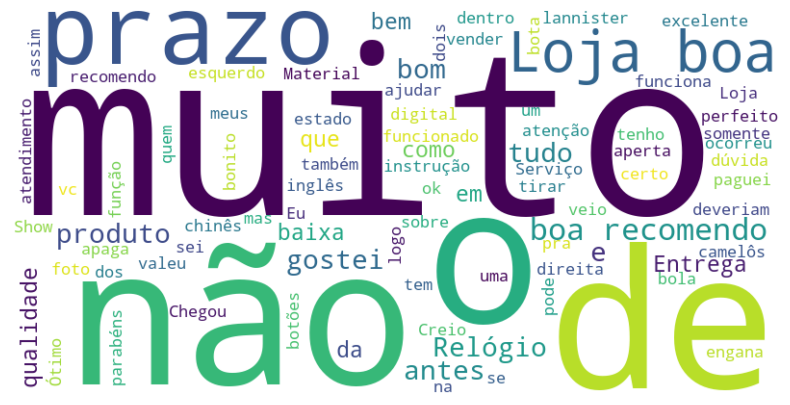

In [175]:
# wordcloud 라이브러리를 활용하여 리뷰 데이터에서 가장 많이 등장하는 단어를 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(data):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(' '.join(data))
    
    plt.figure(figsize=(10, 5))
    # plt.title('리뷰 데이터에서 가장 많이 등장하는 단어')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(relogios_presentes_review_data['review_comment_message'])